In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

ModuleNotFoundError: No module named 'google.colab'

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
from scipy.stats import pareto
import time
np.random.seed(5)

In [3]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [32]:
def rejection_sampling(pi1, pi2):

  # def f(x):
  #   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
  #           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


  # root = fsolve(f, [ini1,ini2])
    
  # pi1 = min(root)
  # pi2 = max(root)
  #using rejection sampling, get N random price samples
    N = 10000
    n = 0
    #A =(pi2/pi1-1)*(pi2-pi1)/don
    don = pi2*np.log(pi2/pi1) - (pi2-pi1)
    env =(pi2/pi1-1)/don
    rej_sample =[]
    while(n <= N):
        x = uniform.rvs(loc=pi1, scale=pi2-pi1)
        a = (pi2/x-1)/don/env
        u1 = uniform.rvs()
        if (u1 <= a):
            rej_sample.append(x)
            n += 1
    return rej_sample

In [40]:
# Experiment Randomisation first compute the log-lottery with Pareto(1) distribution:
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list=[]
r_rho_list=[]
APX_pareto = []

n = 100000
step = np.linspace(0.001,10,50)
def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    r = i
    c = 1+np.sqrt(1+1/(r**2))
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    bid_pareto= pareto.rvs(c,size=n)

    r = sigma/u
    r_list.append(r)

    #p_d = 1 + 4* (sigma/u)**2
    p_d = fsolve(F, [u-0.1])
    print(F(p_d))
    p_d_list.append(p_d)
    reserve_p = p_d*u/(2*p_d-1)
    reserve_p_list.append(reserve_p)
    opt = 1
    DAPX_pareto.append((opt/reserve_p)[0])  
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.1])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2)
    rexp_revenue_list = []
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(bid_pareto,rp_reserve))
  
    APX_pareto.append(opt/np.average(rexp_revenue_list))
     
    #compute the APX using full-bundle log lottery randomization 
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))


toc = time.clock()
print('time: ' + str(toc-tic))

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[5.15569897e-17]
[0.]


C:\Users\Ariel Lou\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-1.001535e-06]
[2.08166817e-17]
[4.4408921e-16]
[-3.33066907e-14]
[-2.77555756e-16]
[1.26565425e-14]
[-0.07783956]
[-8.8817842e-16]
[2.22044605e-16]
[-0.12253277]
[0.]
[0.]
[-0.15692722]
[0.]
[2.22044605e-16]
[-0.18203755]
[2.22044605e-16]
[0.]
[-0.2001392]
[-3.10862447e-15]
[2.22044605e-16]
[-0.21332065]
[-8.8817842e-16]
[6.66133815e-16]


C:\Users\Ariel Lou\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[-0.22305916]
[4.4408921e-16]
[2.44249065e-15]
[-0.23038322]
[0.]
[3.99680289e-15]
[-0.23599151]
[-8.8817842e-16]
[3.55271368e-15]
[-0.24041786]
[-8.8817842e-16]
[1.99840144e-15]
[-0.24381753]
[-8.8817842e-16]
[1.11022302e-15]
[-0.24659362]
[0.]
[6.66133815e-16]
[-0.24885304]
[-1.77635684e-15]
[2.22044605e-16]
[-0.25071153]
[0.]
[0.]
[-0.25225895]
[1.77635684e-15]
[0.]
[-0.25371382]
[0.]
[0.]
[-0.25466187]
[-1.77635684e-15]
[2.22044605e-16]
[-0.2556042]
[0.]
[0.]
[-0.25641559]
[0.]
[-2.22044605e-16]
[-0.25711896]
[3.55271368e-15]
[0.]
[-0.25773248]
[-3.55271368e-15]
[2.22044605e-16]
[-0.25827069]
[0.]
[0.]
[-0.25874533]
[3.55271368e-15]
[-2.22044605e-16]
[-0.259166]
[-3.55271368e-15]
[2.22044605e-16]
[-0.25954042]
[0.]
[6.66133815e-16]
[-0.26017817]
[1.42108547e-14]
[0.]
[-0.26033121]
[7.10542736e-15]
[2.22044605e-16]
[-0.26044649]
[7.10542736e-15]
[-2.22044605e-16]
[-0.26069088]
[0.]
[0.]
[-0.26091299]
[0.]
[-4.4408921e-16]
[-0.26111501]
[0.]
[2.22044605e-16]
[-0.26129852]
[0.]
[2.220

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [36]:
# Experiment Randomisation first compute the log-lottery with Pareto(1) distribution:
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list=[]

APX_pareto = []

n = 100000
step = np.linspace(0.001,10,50)
def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    r = i
    c = 1+np.sqrt(1+1/(r**2))
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    bid_pareto= pareto.rvs(c,size=n)

    r = sigma/u
    r_list.append(r)

    #p_d = 1 + 4* (sigma/u)**2
    p_d = fsolve(F, [u-0.1])
    print(F(p_d))
  
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.1])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
   
     
    #compute the APX using full-bundle log lottery randomization 
    r_rho = fsolve(random_rho, [u])

    print(random_rho(r_rho))


toc = time.clock()
print('time: ' + str(toc-tic))

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Ariel Lou\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[5.15569897e-17]
[0.]
[-1.001535e-06]
[2.08166817e-17]
[4.4408921e-16]
[-3.33066907e-14]
[-2.77555756e-16]
[1.26565425e-14]
[-0.07783956]
[-8.8817842e-16]
[2.22044605e-16]
[-0.12253277]
[0.]
[0.]
[-0.15692722]
[0.]
[2.22044605e-16]
[-0.18203755]
[2.22044605e-16]
[0.]
[-0.2001392]
[-3.10862447e-15]
[2.22044605e-16]
[-0.21332065]
[-8.8817842e-16]
[6.66133815e-16]
[-0.22305916]
[4.4408921e-16]
[2.44249065e-15]
[-0.23038322]
[0.]
[3.99680289e-15]
[-0.23599151]
[-8.8817842e-16]
[3.55271368e-15]
[-0.24041786]
[-8.8817842e-16]
[1.99840144e-15]
[-0.24381753]
[-8.8817842e-16]
[1.11022302e-15]
[-0.24659362]
[0.]
[6.66133815e-16]
[-0.24885304]
[-1.77635684e-15]
[2.22044605e-16]
[-0.25071153]
[0.]
[0.]
[-0.25225895]
[1.77635684e-15]
[0.]
[-0.25371382]
[0.]
[0.]
[-0.25466187]
[-1.77635684e-15]
[2.22044605e-16]
[-0.2556042]
[0.]
[0.]
[-0.25641559]
[0.]
[-2.22044605e-16]
[-0.25711896]
[3.55271368e-15]
[0.]
[-0.25773248]
[-3.55271368e-15]
[2.22044605e-16]
[-0.25827069]
[0.]
[0.]
[-0.25874533]
[3.55271

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [39]:
r_list

[0.010000000000000002,
 0.21387755102040823,
 0.4177551020408163,
 0.6216326530612246,
 0.8255102040816329,
 1.0293877551020412,
 1.2332653061224481,
 1.4371428571428568,
 1.641020408163264,
 1.844897959183676,
 2.048775510204083,
 2.2526530612244913,
 2.4565306122448987,
 2.6604081632653047,
 2.8642857142857183,
 3.0681632653061137,
 3.27204081632652,
 3.4759183673469476,
 3.6797959183673488,
 3.8836734693877717,
 4.087551020408162,
 4.291428571428574,
 4.495306122448979,
 4.699183673469404,
 4.903061224489776,
 5.106938775510244,
 5.310816326530662,
 5.514693877551024,
 5.718571428571416,
 5.922448979591834,
 6.126326530612244,
 6.330204081632659,
 6.534081632653109,
 6.737959183673368,
 6.941836734693842,
 7.145714285714274,
 7.3495918367345965,
 7.553469387755053,
 7.757346938775544,
 7.96122448979608,
 8.165102040816386,
 8.368979591836874,
 8.572857142857146,
 8.776734693877486,
 8.980612244898035,
 9.184489795918408,
 9.38836734693871,
 9.592244897958848,
 9.79612244897977,
 9.9

In [26]:
r_rho = fsolve(random_rho, [30])
print(random_rho(r_rho))
r_rho

[9.79670745e-08]


array([11.38811619])

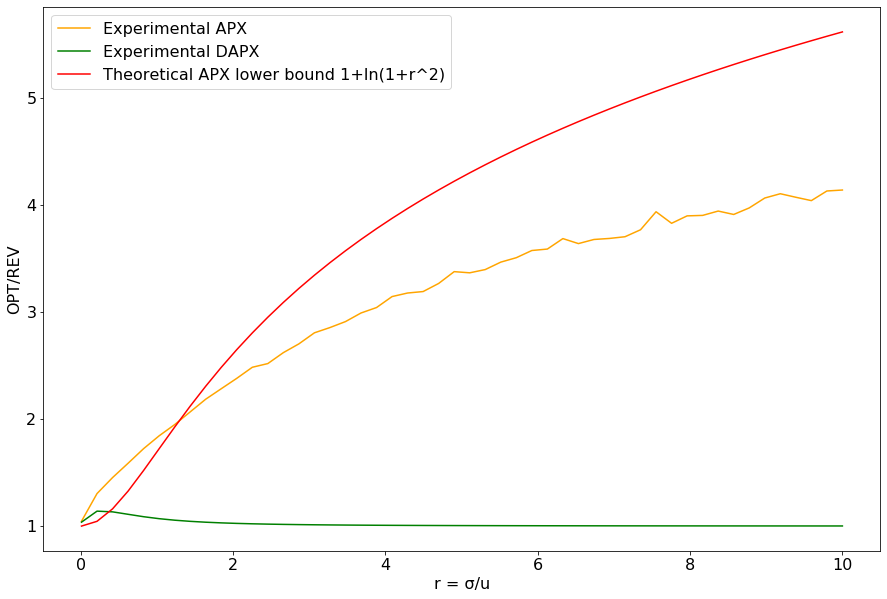

In [38]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 16)
plt.tick_params(axis='y', labelsize= 16)
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("OPT/REV",fontsize=16)
plt.plot(r_list, APX_pareto,color="#FFA500",label="Experimental APX")
plt.plot(r_list, DAPX_pareto,color="green",label="Experimental DAPX")

lower_bound = 1+np.log(1+np.power(r_list,2))
#plt.plot(r_list, ratio,color="blue",label="worst case rho_d")
plt.plot(r_list, lower_bound,color="red",label="Theoretical APX lower bound 1+ln(1+r^2)")
plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("apxpareto1.png",bbox_inches='tight')
plt.show()

In [9]:
import pandas as pd 
  
# creating the DataFrame 
my_df = { 'r' : r_list,
          'DAPX_pareto': DAPX_pareto,
         'APX_pareto': APX_pareto,
         'lower_bound':lower_bound
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('apx_pareto1.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 


CSV String:
 None


In [10]:
# Experiment Randomisation first compute the log-lottery with Pareto(0) distribution:
sigma_list = []
DAPX_pareto0 = []
r_list0 =[]
reserve_p_list = []
p_d_list = []
c_list=[]
opt_revenue =[]
APX_pareto0 = []

n = 100000
step = np.linspace(1.0001, 10, 50)
def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   


def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    
    c = 2*i**2/(i**2-1)
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    bid_pareto= pareto.rvs(c,size=n)
    u = u-1
    r = sigma/u
    r_list0.append(r)

    p_d = fsolve(F, [u+1])
    print(F(p_d))
    p_d_list.append(p_d)
    reserve_p = p_d*u/(2*p_d-1)
    reserve_p_list.append(reserve_p)
    opt_p = 1/(c-1)
    opt_revenue = auction_exp(bid_pareto-1,opt_p)
    exp_revenue = auction_exp(bid_pareto-1,reserve_p)

    DAPX_pareto0.append((opt_revenue/exp_revenue)[0])  
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.1])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2)
    rexp_revenue_list = []
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(bid_pareto-1,rp_reserve))
  
    APX_pareto0.append(opt_revenue/np.average(rexp_revenue_list))


toc = time.clock()
print('time: ' + str(toc-tic))
lower_bound = 1+np.log(1+np.power(r_list0,2))
# creating the DataFrame 
my_df = { 'r' : r_list0,
          'DAPX_pareto0': DAPX_pareto0,
         'APX_pareto0': APX_pareto0,
         'lower_bound':lower_bound
         } 
df = pd.DataFrame(my_df) 
  

gfg_csv_data = df.to_csv('apx_pareto0.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[2.22044605e-16]
[-1.35525272e-20]
[1.11022302e-15]
[2.77555756e-17]
[-4.4408921e-16]
[0.]
[0.]
[5.55111512e-17]
[-1.33226763e-15]
[0.]
[0.]
[0.]
[-8.8817842e-16]
[0.]
[0.]
[6.43929354e-15]
[0.]
[1.99840144e-15]
[8.8817842e-16]
[7.77156117e-16]
[0.]
[2.22044605e-16]
[0.]
[1.11022302e-16]
[-1.77635684e-15]
[1.11022302e-16]
[1.77635684e-15]
[0.]
[0.]
[0.]
[0.]
[1.11022302e-16]
[1.77635684e-15]
[1.11022302e-16]
[0.]
[-1.11022302e-16]
[3.55271368e-15]
[0.]
[-3.55271368e-15]
[-1.11022302e-16]
[3.55271368e-15]
[-1.11022302e-16]
[3.55271368e-15]
[0.]
[-3.55271368e-15]
[-2.22044605e-16]
[3.55271368e-15]
[-2.22044605e-16]
[0.]
[1.11022302e-16]
[3.55271368e-15]
[1.11022302e-16]
[0.]
[1.11022302e-16]
[0.]
[-1.11022302e-16]
[0.]
[1.11022302e-16]
[0.]
[0.]
[0.]
[-1.57651669e-14]
[7.10542736e-15]
[-9.2148511e-15]
[0.]
[-5.44009282e-15]
[7.10542736e-15]
[-3.44169138e-15]
[0.]
[7.77156117e-15]
[-7.10542736e-15]
[6.66133815e-15]
[-7.10542736e-15]
[5.55111512e-15]
[7.10542736e-15]
[4.88498131e-15]
[-7.1

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


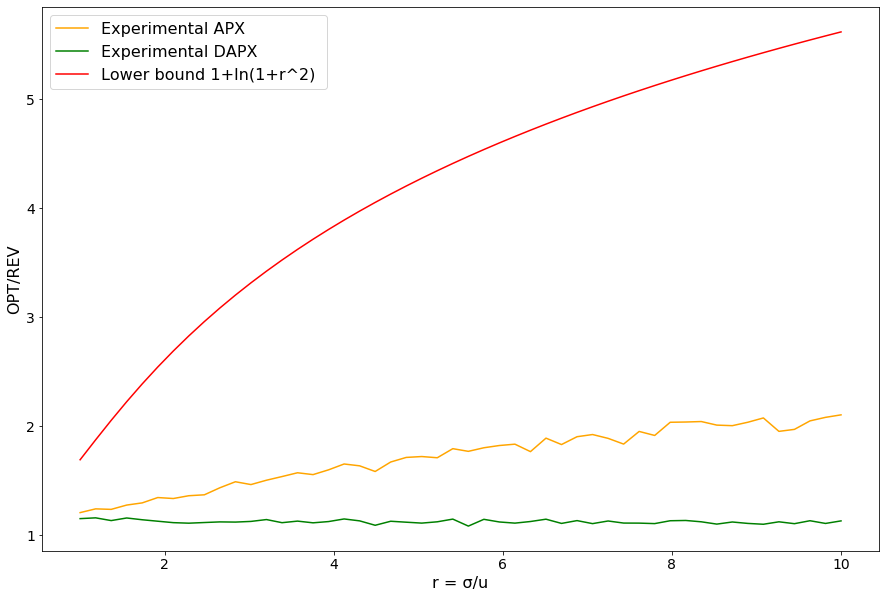

In [34]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("OPT/REV",fontsize=16)
plt.plot(r_list0, APX_pareto0,color="#FFA500",label="Experimental APX")
plt.plot(r_list0, DAPX_pareto0,color="green",label="Experimental DAPX")

lower_bound = 1+np.log(1+np.power(r_list0,2))
#plt.plot(r_list, ratio,color="blue",label="worst case rho_d")
plt.plot(r_list0, lower_bound,color="red",label="Theoretical APX lower bound 1+ln(1+r^2)")
plt.legend(loc="upper left",fontsize = 16)
plt.savefig("apxpareto0.png",bbox_inches='tight')
plt.show()

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


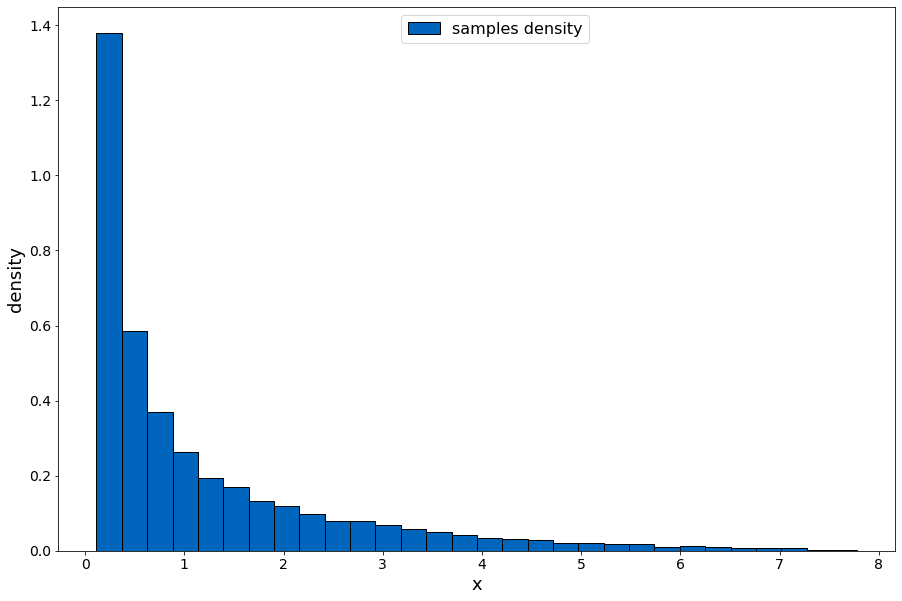

In [20]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)

plt.xlabel("x",fontsize=18)
plt.ylabel("density",fontsize=18)

plt.hist(rej_sample, color = '#0065bd',normed=True, edgecolor = 'black',bins = 30, label = "samples density")


plt.legend(loc="upper left",fontsize = 16,bbox_to_anchor=(0.4,1))
plt.savefig("rejectionS.png",bbox_inches='tight')
plt.show()


In [42]:

for i in np.linspace(1.0001, 10, 50):
    c = 2*i**2/(i**2-1)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    bid_pareto= pareto.rvs(c,size=n)
    u = u-1
    r = sigma/u
    r_list0.append(r)

    p_d = fsolve(F, [u+1])
    print(F(p_d))


[2.22044605e-16]
[1.11022302e-15]
[-4.4408921e-16]
[0.]
[-1.33226763e-15]
[0.]
[-8.8817842e-16]
[0.]
[0.]
[8.8817842e-16]
[0.]
[0.]
[-1.77635684e-15]
[1.77635684e-15]
[0.]
[0.]
[1.77635684e-15]
[0.]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[0.]
[3.55271368e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.10542736e-15]
[0.]
[7.10542736e-15]
[0.]
[-7.10542736e-15]
[-7.10542736e-15]
[7.10542736e-15]
[-7.10542736e-15]
[1.42108547e-14]
[-1.42108547e-14]
[1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
[0.]
[-1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
